### Schema

0. x coordinate
1. y coordinate
2. timestamp
3. pen-up
4. azimuth angle
5. altitude angle
6. Pressure

In [124]:
import pandas as pd
import numpy as np
from os import path
import sys

#adding local modules
module_path = path.abspath(path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from preprocess.biodarw_feature_extraction import extract_residues, extract_radio

#plotting
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.style.use('seaborn-notebook')

from scipy.signal import resample


In [144]:
features=['x','y','timestamp','pen_up','pressure']
root_path = "/data/elekin/data/origin/etw"

In [ ]:
load_arquimedes_dataset

In [2]:
metadf=pd.read_csv(path.join(doc_path,"metadata-202106-v1.csv"),index_col=0)
metadf[metadf["temblor"]=='si']

,abs_path,relative_path,temblor,Sexo,TRS,age,level
name,,,,,,,
T001,/data/elekin/data/origin/ethw/protocolo_temblo...,T001/session00001/u00005s00001_hw00001.svc,si,M,36,74,2
T002,/data/elekin/data/origin/ethw/protocolo_temblo...,T002/session00001/u00006s00001_hw00002.svc,si,M,40,71,2
T002,/data/elekin/data/origin/ethw/protocolo_temblo...,T002/session00001/u00006s00001_hw00001.svc,si,M,40,71,2
T005,/data/elekin/data/origin/ethw/protocolo_temblo...,T005/session00001/u00009s00001_hw00001.svc,si,M,29,69,2
T006,/data/elekin/data/origin/ethw/protocolo_temblo...,T006/session00001/u00010s00001_hw00001.svc,si,F,19,77,2
T008,/data/elekin/data/origin/ethw/protocolo_temblo...,T008/session00001/u00013s00001_hw00001.svc,si,F,3,68,1
T009,/data/elekin/data/origin/ethw/protocolo_temblo...,T009/session00001/u00014s00001_hw00001.svc,si,F,16,66,2
T010,/data/elekin/data/origin/ethw/protocolo_temblo...,T010/session00001/u00015s00001_hw00002.svc,si,M,16,61,2
T012,/data/elekin/data/origin/ethw/protocolo_temblo...,T012/session00001/u00005s00001_hw00001.svc,si,F,11,51,1


In [498]:
# Creating a data structure with subjects time series and tremor levels
 
X = []
y = []

for path, level in zip(metadf.abs_path, metadf.level):
    df = pd.read_csv(path, sep="\s+",header=None,names=features,skiprows=1,usecols=[0,1,2,3,6])
    X.append(resample(df.values.astype('int16'), 4096))
    y.append(level)
    dataframes.append(df)

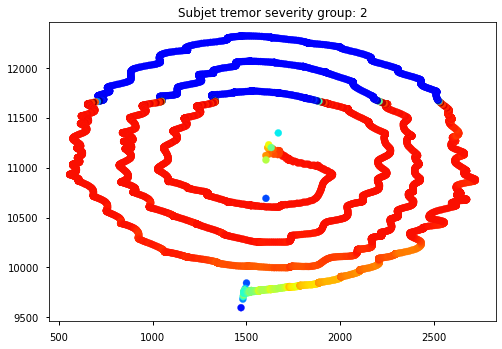

In [499]:
idx = 15
label = y[idx]
plt.scatter(X[idx][:,0], X[idx][:,1], c=X[idx][:,4], cmap='jet')
_=plt.title("Subjet tremor severity group: {}".format(label))

In [523]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
import mlflow
import mlflow.tensorflow


In [525]:
seed = 38
n_outputs = 3
data_size = np.array(X).shape[0]
n_timesteps = np.array(X).shape[1]
n_features = np.array(X).shape[1]

shuffle_buffer = data_size
mini_batch_size=4
steps_per_epoch = round(data_size/mini_batch_size)
train_size = int(0.67 * data_size)
test_size = int(0.33 * data_size)

AUTOTUNE = tf.data.experimental.AUTOTUNE # Adapt preprocessing and prefetching dynamically to reduce GPU and CPU idle time

URI = "http://192.168.1.12:5001"

mlflow.set_tracking_uri(URI)
mlflow.set_experiment('/archimedes-dl')
mlflow.tensorflow.autolog(every_n_iter=2)


2021/06/13 21:33:28 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


INFO: '/archimedes-dl' does not exist. Creating a new experiment


In [514]:
#one hot encoding
oe = OneHotEncoder(handle_unknown='ignore')


#split dataset in train and test
dataset = tf.data.Dataset.from_tensor_slices((X, tf.one_hot(y,n_outputs)))
full_dataset = dataset.shuffle(shuffle_buffer, seed=seed)
train_dataset = full_dataset.take(train_size).batch(mini_batch_size).prefetch(AUTOTUNE).cache()
test_dataset = full_dataset.skip(train_size).batch(mini_batch_size).prefetch(AUTOTUNE).cache()

# for feat, targ in train_dataset.shuffle(shuffle_buffer):
# #         print ('Features: {0}'.format(feat, targ))
#     print ('Target train: {1}'.format(feat, targ))
    
# for feat, targ in test_dataset.shuffle(shuffle_buffer):
# #         print ('Features test: {}, Target test: {}'.format(feat, targ))
#         print ('Target test: {1}'.format(feat, targ))

# print("{0} train batches and {1} test batches of {2} mini batch size and {3} steps per epoch".format(len(train_dataset), 
#                                                                               len(test_dataset),
#                                                                               mini_batch_size,
#                                                                                 steps_per_epoch))

In [515]:
# #Early stop configuration
earlystop_callback = EarlyStopping(
  monitor='val_accuracy', min_delta=1e-3,
  patience=200)

training_earlystop_callback = EarlyStopping(
  monitor='accuracy', min_delta=1e-4,
  patience=200)

def get_callbacks(name):
    return [
        tfdocs.modeling.EpochDots(),
        earlystop_callback,
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2e2, min_delta=1e-5),
        #tf.keras.callbacks.TensorBoard(logdir/name),
      ]

def compile_and_fit(model, train_dataset, test_dataset, name, optimizer=None, max_epochs=1e3):
    tf.keras.backend.clear_session()# avoid clutter from old models and layers, especially when memory is limited
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    tf.random.set_seed(seed) # establecemos la semilla para tensorflow
    history = model.fit(train_dataset, 
                        use_multiprocessing=True, 
                        validation_data=test_dataset, epochs=max_epochs, 
                        callbacks=get_callbacks(name),
                        verbose=0, shuffle=True)
    return history

# Many models train better if you gradually reduce the learning rate during training. 
# Use optimizers.schedules to reduce the learning rate over time:
def get_optimizer(steps_per_epoch=1, lr=1e-4, multiplier=1e3):
    lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(lr,
                                                                 decay_steps=steps_per_epoch*multiplier,
                                                                 decay_rate=1,
                                                                 staircase=False)
    return tf.keras.optimizers.Adam(lr_schedule)

In [527]:
size_histories = {}
run = 'lstm/tiny'
mlflow.start_run(run_name=run)

<ActiveRun: >

In [528]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(256, activation=tf.nn.tanh, return_sequences=False, input_shape=(4096,5)))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu, name='hidden_layer'))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.sigmoid, name='output'))

In [533]:
size_histories[run] = compile_and_fit(model, train_dataset, test_dataset,
                                              run, 
                                              optimizer=get_optimizer(),
#                                               optimizer=tf.keras.optimizers.Adam(0.001), 
#                                               optimizer = tf.keras.optimizers.SGD(lr=lr, momentum=0.9),
                                              max_epochs=1000)

print("\n#######################Evaluation###########################")
# Evaluate the model on the test data using `evaluate`
print('train acc:', max(size_histories[run].history["accuracy"]))
print('test acc:', max(size_histories[run].history["val_accuracy"]))

2021/06/13 21:52:51 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.6/dist-packages/mlflow/utils/autologging_utils/__init__.py:88: UserWarning: Logging to MLflow failed: INVALID_PARAMETER_VALUE: The run 4e05e8a1511d435b81b2685d305a9fbc must be in the 'active' state. Current state is deleted."


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               268288    
_________________________________________________________________
output (Dense)               (None, 3)                 771       
Total params: 269,059
Trainable params: 269,059
Non-trainable params: 0
_________________________________________________________________


2021/06/13 21:52:51 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.6/dist-packages/mlflow/tensorflow.py:1008: UserWarning: Logging to MLflow failed: INVALID_PARAMETER_VALUE: The run 4e05e8a1511d435b81b2685d305a9fbc must be in the 'active' state. Current state is deleted."
2021/06/13 21:52:51 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.6/dist-packages/mlflow/tensorflow.py:777: UserWarning: Logging to MLflow failed: INVALID_PARAMETER_VALUE: The run 4e05e8a1511d435b81b2685d305a9fbc must be in the 'active' state. Current state is deleted."
2021/06/13 21:52:58 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.6/dist-packages/mlflow/tensorflow.py:787: UserWarning: Logging to MLflow failed: Anonymous credentials cannot be refreshed."


2021/06/13 21:53:01 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.6/dist-packages/mlflow/utils/autologging_utils/__init__.py:202: UserWarning: Logging to MLflow failed: INVALID_PARAMETER_VALUE: The run 4e05e8a1511d435b81b2685d305a9fbc must be in the 'active' state. Current state is deleted."



Epoch: 0, accuracy:0.8857,  loss:0.4151,  val_accuracy:0.7222,  val_loss:0.6933,  
.......

KeyboardInterrupt: 

In [532]:
pip install google-cloud-storage

     |████████████████████████████████| 103 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 198 kB 6.5 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
